In [216]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mandelbrot import mandelbrot, mandelbrot_matrix, complex_matrix
from monte_carlo_integration import mc_int_estimate

In [217]:
def complex_matrix(xmin, xmax, ymin, ymax, pixel_density):
    re = np.linspace(xmin, xmax, int((xmax - xmin) * pixel_density))
    im = np.linspace(ymin, ymax, int((ymax - ymin) * pixel_density))
    return re[np.newaxis, :] + im[:, np.newaxis] * 1j

In [218]:
def mandelbrot_matrix(matrix, iterations):
    for i in range(np.shape(matrix)[0]):
        for j in range(np.shape(matrix)[1]):
            value = mandelbrot(matrix[i][j], iterations)
            matrix[i][j] = value
    return matrix

def mandelbrot(c, iterations):
    z = 0
    for _ in range(iterations):
        z = z**2 + c
    return z >= -2 and z <= 2

In [219]:
mat = complex_matrix(-2, 1, -1, 1, 100)

In [220]:
for i in range(np.shape(mat)[0]):
    for j in range(np.shape(mat)[1]):
        v = mandelbrot(mat[i][j], 100)
        mat[i][j] = v

C:\Users\kevin\AppData\Local\Temp\ipykernel_17092\1946657824.py:11: RuntimeWarning: overflow encountered in scalar power
  z = z**2 + c
C:\Users\kevin\AppData\Local\Temp\ipykernel_17092\1946657824.py:11: RuntimeWarning: invalid value encountered in scalar power
  z = z**2 + c


In [221]:
# sns.heatmap(np.real(mat), xticklabels=0, yticklabels =0, cbar=False, square=True)
# plt.show()

In [222]:
def mc_int_estimate(iterations, samples):
    matrix = complex_matrix(-2, 1, -1, 1, 100)
    mandelbrot = mandelbrot_matrix(matrix, iterations)
    in_mandelbrot = 0
    for i in range(samples):
        if np.real(mandelbrot[np.random.randint(np.shape(mandelbrot)[0]), np.random.randint(np.shape(mandelbrot)[1])]):
            in_mandelbrot += 1
    return in_mandelbrot/samples * ((1- -2)* (1- - 1))

In [223]:
l = []
# for i in np.linspace(50, 500, 10):
#     l.append(mc_int_estimate(int(i), 100))
# plt.plot(np.linspace(50, 500, 10), l)
# plt.xlabel('number of iterations')
# plt.ylabel('Area of mandelbrot set')
# plt.title('The relation between the number of iterations and the area of the Mandelbrot set')
# plt.show()


In [224]:
def statistics(iterations, samples, runs, type_of_sampling = []):
    areas = np.zeros([samples, 3])
    for i in range(runs):
        areas[i] = mc_int_estimate(int(iterations), samples)#, type_of_sampling)     #mc_int_estimate in deze file is geloof ik
    mean_area = np.mean(areas, axis=0)
    confidence_interval = np.percentile(areas, [2.5, 97.5], axis=0)
    return [mean_area, confidence_interval]

In [225]:
def stats_per_iteration_value(iterations, samples, runs, type_of_sampling = []):
    type_of_sampling = ['randomS', 'LatinS', 'OrthogS']
    mean_area =[]
    confidence_interval =[]
    A_j = np.zeros((iterations, 3, 3))
    for i in range(iterations):
        mean_area, confidence_interval = statistics(int(i+1), samples, runs)#, type_of_sampling)
        A_j[i,0] = mean_area
        A_j[i,1] = confidence_interval[0]
        A_j[i,2] = confidence_interval[1]
    return A_j

In [226]:
iterations = 100                           #Dit blok duurt een kwartier voor i=100, r=10 en s=100
runs = 3                                   #Als we het 'echt' willen runnen, duurt dit blok dus erg lang
samples = 100
# A_j = stats_per_iteration_value(iterations, samples, runs, type_of_sampling = [])

In [227]:
# print(f'Estimated A_M = {A_j[-1][0]} with a 95%-confidence interval of: {A_j[-1][1:3]}.')
# plt.plot(np.linspace(1,iterations+1, iterations), A_j[:,0][:,0]- A_j[:,0][:,0][-1]*np.ones(len(A_j[:,0])))
# # plt.fill_between(np.linspace(1,iterations+1, iterations),A_j[:,0][:,0]- A_j[:,0][:,0][-1]*np.ones(len(A_j[:,0])))
# plt.xlabel('number of iterations')
# plt.ylabel('Area difference')
# plt.title(f'Area difference between current number of iterations and {iterations} iterations')
# plt.show()

In [228]:
def mandelbrot(c, iterations):
    z = 0
    for _ in range(iterations):
        z = z**2 + c
    return abs(z) <= 2

In [229]:
def random_sampling(mb_matrix, samples):
    counter = 0
    
    for k in range(samples):
        i = np.random.randint(0, np.shape(mb_matrix)[0]-1)
        j = np.random.randint(0, np.shape(mb_matrix)[1]-1)
        
        if np.real(mb_matrix[i,j]):
            counter += 1

    return counter/samples

In [230]:
def Latin_hypercube(mb_matrix, samples):
    counter = 0
    
    if samples > max(np.shape(mb_matrix)[0], np.shape(mb_matrix)[1]):
        samples = max(np.shape(mb_matrix)[0], np.shape(mb_matrix)[1])
        print("The amount of samples used, was corrected to", samples)
    

    row_indexes = [v for v in range(np.shape(mb_matrix)[0])]
    column_indexes = [v for v in range(np.shape(mb_matrix)[1])]
    for i in range(samples):
        i = np.random.choice(row_indexes)
        j = np.random.choice(column_indexes)
        if np.real(mb_matrix[i,j]):
                counter += 1
        row_indexes.remove(i)
        column_indexes.remove(j)

    return counter/samples

In [231]:
def Orthogonal_sampling(mb_matrix, samples):
    if samples > np.shape(mb_matrix)[0] * np.shape(mb_matrix)[1]:
        samples = np.shape(mb_matrix)[0] * np.shape(mb_matrix)[1]
        print("The amount of samples used, was corrected to", samples)
    major = int(np.ceil(np.sqrt(samples)))
    x_array = np.arange(0, major**2, 1).reshape(major, major)
    y_array = np.arange(0, major**2, 1).reshape(major, major)
    # Transpose so permutation over different axis
    y_array = y_array.T
    for i in range(major):
        x_array[i] = np.random.permutation(x_array[i])
        y_array[i] = np.random.permutation(y_array[i])
    # Transpose back
    y_array = y_array.T
    counter = 0
    for i in range(samples):
        x_index = int(x_array[int((i-i%major)/major)][i%major])
        y_index = int(y_array[int((i-i%major)/major)][i%major])
        if np.real(mb_matrix[int(x_index*(np.shape(mb_matrix)[0]/major**2))][int(y_index*(np.shape(mb_matrix)[1]/major**2))]):
            counter += 1
    return counter/samples



In [232]:
def MC_integration(iterations, samples, type_of_sampling = []):
    
    xmin = -2
    xmax = 1
    ymin = -1
    ymax = 1
    total_area = abs(xmax - xmin)*abs(ymax-ymin)
    
    # TODO choose pixel density/add to function variables
    matrix = complex_matrix(xmin, xmax, ymin, ymax, 100)
    mb_matrix = mandelbrot(matrix, iterations)
    
    ratio = np.zeros((1, 3))
    
    if 'randomS' in type_of_sampling:
        ratio[0][0] = random_sampling(mb_matrix, samples)
        
    if 'LatinS' in type_of_sampling:
        ratio[0][1] = Latin_hypercube(mb_matrix, samples)

    if 'OrthogS' in type_of_sampling:
        ratio[0][2] = Orthogonal_sampling(mb_matrix, samples)
    
    return total_area*ratio

In [233]:
def statistics(iterations, samples, runs, type_of_sampling = []):
    areas = np.zeros([runs, len(type_of_sampling)])
    for i in range(runs):
        areas[i] = MC_integration(int(iterations), samples, type_of_sampling)
    mean_area = np.mean(areas, axis=0)
    std_area = np.std(areas, axis=0)
    confidence_interval = np.percentile(areas, [2.5, 97.5], axis=0)
    return [mean_area, std_area, confidence_interval]

In [252]:
def stats_per_iteration_value(iterations, samples, runs, type_of_sampling = []):
    mean_area =[]
    confidence_interval =[]
    A_j = np.zeros((iterations, 4, len(type_of_sampling)))
    for i in range(iterations):
        mean_area, std_area, confidence_interval =statistics(int(i+1), samples, runs, type_of_sampling)
        A_j[i,0] = mean_area
        A_j[i,1] = std_area
        A_j[i,2] = confidence_interval[0]
        A_j[i,3] = confidence_interval[1]
    return A_j

In [236]:
iterations = 50
runs = 10
samples = 100
type_of_sampling = ['randomS', 'LatinS', 'OrthogS']
A_j = stats_per_iteration_value(iterations, samples, runs, type_of_sampling)

C:\Users\kevin\AppData\Local\Temp\ipykernel_17092\1320952773.py:4: RuntimeWarning: overflow encountered in square
  z = z**2 + c
C:\Users\kevin\AppData\Local\Temp\ipykernel_17092\1320952773.py:4: RuntimeWarning: invalid value encountered in square
  z = z**2 + c


In [251]:
def plot(A_j, A_M_est = False, difference = False):
    iterations = np.shape(A_j)[0]
    if A_M_est:
        print(f'Estimated A_M with random sampling = {A_j[:,0][-1][0]}')
        print(f'Estimated A_M with latin hypercube = {A_j[:,0][-1][1]}')
        print(f'Estimated A_M with orthogonal sampling = {A_j[:,0][-1][2]}')
    plt.figure()
    if difference:
        plt.plot(np.linspace(1,iterations+1, iterations), A_j[:,0][:,0] - A_j[:,0][:,0][-1]*np.ones(len(A_j[:,0])), label = 'Random sampling', color='red')
        plt.plot(np.linspace(1,iterations+1, iterations), A_j[:,0][:,1]- A_j[:,0][:,1][-1]*np.ones(len(A_j[:,0])), label = 'Latin hypercube', color='yellow')
        plt.plot(np.linspace(1,iterations+1, iterations), A_j[:,0][:,2]- A_j[:,0][:,2][-1]*np.ones(len(A_j[:,0])), label = 'Orthogonal sampling', color='blue')
        plt.fill_between(np.linspace(1,iterations+1, iterations), np.maximum(A_j[:,2][:,0] - A_j[:,0][:,0][-1]*np.ones(len(A_j[:,0])), np.zeros(iterations)), A_j[:,3][:,0] - A_j[:,0][:,0][-1]*np.ones(len(A_j[:,0])), color = 'red', alpha= 0.5)
        plt.fill_between(np.linspace(1,iterations+1, iterations), np.maximum(A_j[:,2][:,1]- A_j[:,0][:,1][-1]*np.ones(len(A_j[:,0])), np.zeros(iterations)), A_j[:,3][:,1]- A_j[:,0][:,1][-1]*np.ones(len(A_j[:,0])), color = 'yellow', alpha= 0.5)
        plt.fill_between(np.linspace(1,iterations+1, iterations), np.maximum(A_j[:,2][:,2]- A_j[:,0][:,2][-1]*np.ones(len(A_j[:,0])), np.zeros(iterations)), A_j[:,3][:,2]- A_j[:,0][:,2][-1]*np.ones(len(A_j[:,0])), color = 'blue', alpha= 0.5)
        plt.ylabel('Area difference')
        plt.title(f'Number of iterations against the area difference between current number of iterations and the maximum number of iterations = {iterations}')
    else: 
        plt.plot(np.linspace(1,iterations+1, iterations), A_j[:,0][:,0], label = 'Random sampling', color='red')
        plt.plot(np.linspace(1,iterations+1, iterations), A_j[:,0][:,1], label = 'Latin hypercube', color='yellow')
        plt.plot(np.linspace(1,iterations+1, iterations), A_j[:,0][:,2], label = 'Orthogonal sampling', color='blue')
        plt.fill_between(np.linspace(1,iterations+1, iterations), A_j[:,2][:,0], A_j[:,3][:,0], color = 'red', alpha= 0.5)
        plt.fill_between(np.linspace(1,iterations+1, iterations), A_j[:,2][:,1], A_j[:,3][:,1], color = 'yellow', alpha= 0.5)
        plt.fill_between(np.linspace(1,iterations+1, iterations), A_j[:,2][:,2], A_j[:,3][:,2], color = 'blue', alpha= 0.5)
        plt.ylabel('Estimated area of Mandelbrot set')
        plt.title(f'Number of iterations against the area of the Mandelbrot set')
    plt.xlabel('Number of iterations')
    plt.legend()
    plt.show()

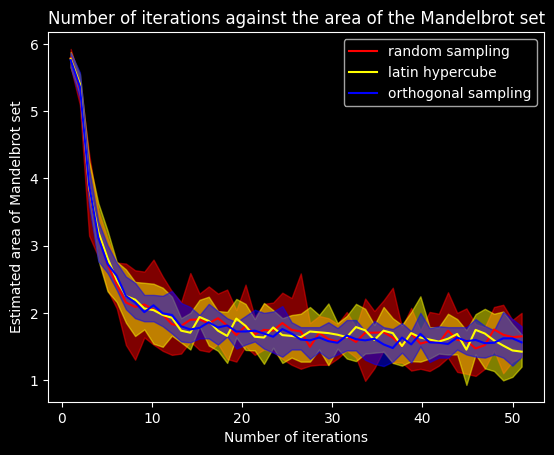

In [250]:
# difference = True
# A_M_est = True
plot(A_j)#A_M_est, difference)